# MachineLearning: Ensembles: Solution

### create some dummy data

* HINT: use make_blobs or make_classification or make_gaussian_quantiles

In [1]:
from sklearn.datasets import make_moons
X, y = make_moons(noise=0.2)

### plot the dummy data

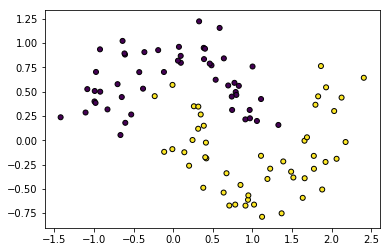

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')
plt.show()

### split dummy data into random train and test subsets

* HINT: train_test_split()

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y)

### What is the `stratify` parameter in train_test_split()?

`stratify` makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

### apply the VotingClassifier to the DecisionTreeClassifier and LogisticRegression

In [4]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
voting = VotingClassifier(
    [('logreg', LogisticRegression(C=100)),
    ('tree', DecisionTreeClassifier(max_depth=3))],
    voting='soft')
voting.fit(X_train, y_train)
lr, tree = voting.estimators_

C:\Users\KUNAL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Evaluate the models

* HINT: accuracy, confusion matrix, classification report, precision, recall and F-measures.

In [5]:
print("LogisticRegression score: {:.2f}".format(lr.score(X_test, y_test)))
print("DecisionTreeClassifier score: {:.2f}".format(tree.score(X_test, y_test)))
print("VotingClassifier score: {:.2f}".format(voting.score(X_test, y_test)))

LogisticRegression score: 0.92
DecisionTreeClassifier score: 0.92
VotingClassifier score: 0.92


### apply the BaggingClassifier

In [6]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
            DecisionTreeClassifier(), 
            n_estimators=50, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

### Evaluate this model

* HINT: accuracy, confusion matrix, classification report, precision, recall and F-measures.

In [7]:
print("BaggingClassifier score: {:.2f}".format(bag_clf.score(X_test, y_test)))

BaggingClassifier score: 0.96


### apply the RandomForestClassifier

In [8]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier(n_estimators=100, max_leaf_nodes=16, n_jobs=-1)
rnd_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=16,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

### Evaluate this model

* HINT: accuracy, confusion matrix, classification report, precision, recall and F-measures.

In [9]:
print("RandomForestClassifier score: {:.2f}".format(rnd_clf.score(X_test, y_test)))

RandomForestClassifier score: 0.96


### apply the GradientBoostingRegressor

In [10]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=15, learning_rate=0.3)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.3, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=15,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

### Evaluate this model

* HINT: accuracy, confusion matrix, classification report, precision, recall and F-measures.

In [11]:
print("GradientBoostingRegressor score: {:.2f}".format(gbrt.score(X_test, y_test)))

GradientBoostingRegressor score: 0.57


### EXTRA: why is this accuracy low?

### apply the GradientBoostingClassifier

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(max_depth=2, n_estimators=15, learning_rate=0.1)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=15,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### Evaluate this model

* HINT: accuracy, confusion matrix, classification report, precision, recall and F-measures.

In [13]:
print("GradientBoostingClassifier score: {:.2f}".format(gbrt.score(X_test, y_test)))

GradientBoostingClassifier score: 0.92


### apply the XGBClassifier

* HINT: "from xgboost"

In [14]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

0.96

### Evaluate this model

* HINT: accuracy, confusion matrix, classification report, precision, recall and F-measures.

In [15]:
print("XGBClassifier score: {:.2f}".format(xgb.score(X_test, y_test)))

XGBClassifier score: 0.96
